In [22]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms, utils
import matplotlib.pyplot as plt
import os

In [23]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [24]:
#download data
import zipfile

cwd = os.getcwd()

from zipfile import ZipFile

with ZipFile("alzheimer's archive.zip", "r") as zip_ref:
    zip_ref.extractall()
    
train_data = ImageFolder('Alzheimer_s Dataset/train',
                        transform = transforms.Compose([
                            transforms.Resize(140),
                            transforms.CenterCrop(128),
                            transforms.Grayscale(),
                            transforms.ToTensor()
                            
                        ]))

In [25]:
train_data

Dataset ImageFolder
    Number of datapoints: 5121
    Root location: Alzheimer_s Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=140, interpolation=bilinear)
               CenterCrop(size=(128, 128))
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [26]:
len(set(train_data.classes)) #four possible classifications

4

torch.Size([4, 1, 128, 128])
0 NonDemented
1 NonDemented
2 VeryMildDemented
3 NonDemented


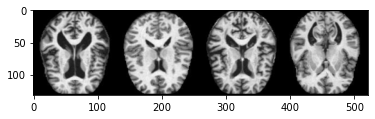

In [27]:
temp_loader = torch.utils.data.DataLoader(train_data, batch_size = 4, shuffle = True, num_workers = 0)

images_batch, label_batch = next(iter(temp_loader))
print(images_batch.size())
grid = utils.make_grid(images_batch)
plt.imshow(grid.numpy().transpose((1, 2, 0)))  

for count, val in enumerate(list([train_data.classes[x.item()] for x in label_batch])):
    print(count, val)

In [28]:

#perform an 80/20 test split to create a training and validation set

dataset_size = len(train_data)
percent_split = 0.8
train_size = int(dataset_size * percent_split)
val_size = dataset_size - train_size

train_set, val_set = torch.utils.data.random_split(train_data, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle = True, num_workers = 0)

val_loader = torch.utils.data.DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 0)



The size of the test images batch is torch.Size([40, 1, 128, 128])
The size of the test labels batch is torch.Size([40])
The test label batch looks like this:
tensor([2, 0, 2, 2, 2, 3, 0, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 0, 2, 3, 2, 2,
        3, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2])
If we take the item() of each element of the test label batch it looks like this:
[2, 0, 2, 2, 2, 3, 0, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 0, 2, 3, 2, 2, 3, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2]
Here's a grid depicting the brain scans:
...and here's how we get the actual classification from the numeric symbol:
['NonDemented', 'MildDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'MildDemented', 'NonDemented', 'VeryMildDemented', 'NonDemented', 'NonD

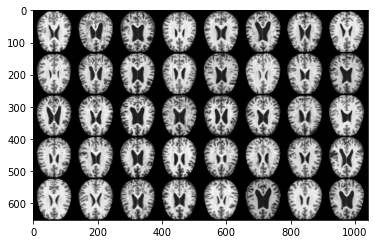

In [29]:
test_data = ImageFolder('Alzheimer_s Dataset/test',
                        transform = transforms.Compose([
                            transforms.Resize(140),
                            transforms.CenterCrop(128),
                            transforms.Grayscale(),
                            transforms.ToTensor()
                            
                        ]))

test_loader = torch.utils.data.DataLoader(test_data, batch_size = 40, shuffle = True, num_workers = 0)

test_images_batch, test_label_batch = next(iter(test_loader))
print("The size of the test images batch is {}".format(test_images_batch.size()))
print("The size of the test labels batch is {}".format(test_label_batch.size()))
print("The test label batch looks like this:")
print(test_label_batch)
print("If we take the item() of each element of the test label batch it looks like this:")
print([x.item() for x in test_label_batch])
print("Here's a grid depicting the brain scans:")
grid = utils.make_grid(test_images_batch)
plt.imshow(grid.numpy().transpose((1, 2, 0)))  
print("...and here's how we get the actual classification from the numeric symbol:")
print(list([test_data.classes[x.item()] for x in test_label_batch]))

In [30]:
# Important question for later: how many of each classification is there in the test set?

In [31]:
from collections import Counter

Counter(test_data)

Counter({(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.]]]),
          0): 1,
         (tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.]]]),
          0): 1,
         (tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   ...,
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0., 0., 0.,  ..., 0., 0., 0.],
                   [0

In [32]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        #initialize the convolutional layers
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 8, kernel_size = 3, stride = 1, padding = 1)

        
        ##initialize the fully connected layers
        self.fc1 = nn.Linear(in_features = 8*16*16, out_features = 10000) #NOTE: we are using maxpool (with a kernel size of 2) thrice, so our 128 x 128 image becomes a 32*32 image.
        self.fc2 = nn.Linear(in_features = 10000, out_features = 500)
        self.fc3 = nn.Linear(in_features = 500, out_features = 4)
        
    def forward(self, _x):
        #Print statements below are useful for debugging shape mismatches.
        #print("input shape is: {}".format(_x.shape)) 
        _x = self.pool(F.relu(self.conv1(_x)))
        #print("shape after one convolution is: {}".format(_x.shape))
        
        _x = self.pool(F.relu(self.conv2(_x)))
        #print("shape after two convolutions is: {}".format(_x.shape))
        
        #adding more layers for assignment:
        _x = self.pool(F.relu(self.conv2(_x)))
        #print("shape after three convolutions is: {}".format(_x.shape))
        
        _x = _x.view(-1, 8*16*16)
        #print(_x.shape)
        _x = F.relu(self.fc1(_x))
        _x = F.relu(self.fc2(_x))
        _x = self.fc3(_x)
        
        return _x
    


In [33]:
EPOCHS = 150
cnn_model = ConvNet()
cnn_model = cnn_model.to(device) #move to the GPU

#define the loss function and optimize

loss_function = nn.CrossEntropyLoss() #because we are performing a classification.
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=1e-3)

torch.Size([1, 128, 128])
VeryMildDemented


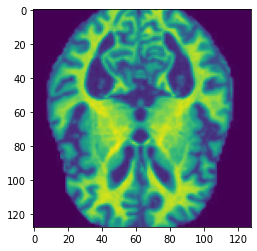

In [34]:
#playing around with validation loader:

val_imgs, val_labels = next(iter(val_loader)) #next() returns the next item in an iterator. 
print(val_imgs[50].shape)
plt.imshow(val_imgs[50].permute(1,2,0))
print(train_data.classes[val_labels[50].item()])

In [35]:
def evaluate_model(data, model, loss_function):
    correct, total, val_acc = 0, 0, 0
    val_loss = []
    predictions = []
    for i, (inputs, labels) in enumerate(data, 0):
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1) # take the maximum along the second dimension.

        loss = loss_function(outputs, labels)
        val_loss.append(loss.item())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        val_acc = correct/total
    mean_loss = sum(val_loss)/len(val_loss)
    return mean_loss, val_acc

    
epoch_g_list = []
training_g_list = []
validation_g_list = []
    
    
training_loss = []
validation_loss = []
validation_accuracy = []

#start training

for epoch in range(1, EPOCHS + 1):
    cnn_model.train() # set the model in training mode
    batch_loss = []
    
#Training the CNN
    for idx, (image_batch, label_batch) in enumerate(train_loader):

        #move the data to the device/GPU
        image_batch = image_batch.to(device)
        label_batch = label_batch.to(device)

        #forward pass
        pred_labels = cnn_model(image_batch)

        #calculate the loss (how wrong the prediction is; i.e. the difference between the predictions and the actual labels)
        loss = loss_function(pred_labels, label_batch)
        batch_loss.append(loss.item())

        #backward pass
        loss.backward()

        optimizer.step() #update parameters, weights, and learning rate (Adam)

        #clear gradients
        optimizer.zero_grad()

    #Evaluate the CNN using the validation set
    cnn_model.eval()
    val_loss, val_accuracy = evaluate_model(val_loader, cnn_model, loss_function)

    validation_loss.append(val_loss)
    validation_accuracy.append(val_accuracy)

    #print the loss
    #show epoch and avg loss

    training_loss.append(sum(batch_loss)/len(batch_loss))
    print("Epoch # {}".format(epoch))
    print('Training loss: {:6f}'.format(training_loss[-1]))
    print('Validation Loss: {:.6f} | Validation accuracy: {}%'.format(val_loss, round(val_accuracy * 100, 2)))
    
    epoch_g_list.append(epoch)
    training_g_list.append(training_loss[-1])
    validation_g_list.append(val_loss)
 
    

    

training_line = training_g_list
validation_line = validation_g_list
epoch_x = epoch_g_list

# Make the plot


Epoch # 1
Training loss: 1.025428
Validation Loss: 1.031842 | Validation accuracy: 41.46%
Epoch # 2
Training loss: 0.917510
Validation Loss: 0.825470 | Validation accuracy: 56.39%
Epoch # 3
Training loss: 0.851132
Validation Loss: 0.768659 | Validation accuracy: 58.83%
Epoch # 4
Training loss: 0.761932
Validation Loss: 0.783768 | Validation accuracy: 60.88%
Epoch # 5
Training loss: 0.715240
Validation Loss: 0.733737 | Validation accuracy: 63.71%
Epoch # 6
Training loss: 0.580518
Validation Loss: 0.531989 | Validation accuracy: 76.59%
Epoch # 7
Training loss: 0.471899
Validation Loss: 0.484992 | Validation accuracy: 78.93%
Epoch # 8
Training loss: 0.321159
Validation Loss: 0.401438 | Validation accuracy: 82.34%
Epoch # 9
Training loss: 0.256408
Validation Loss: 0.382294 | Validation accuracy: 90.34%
Epoch # 10
Training loss: 0.182601
Validation Loss: 0.319791 | Validation accuracy: 88.0%
Epoch # 11
Training loss: 0.117330
Validation Loss: 0.285585 | Validation accuracy: 89.17%
Epoch # 1

Epoch # 92
Training loss: 0.000006
Validation Loss: 0.194215 | Validation accuracy: 96.98%
Epoch # 93
Training loss: 0.000006
Validation Loss: 0.194838 | Validation accuracy: 97.17%
Epoch # 94
Training loss: 0.000006
Validation Loss: 0.196339 | Validation accuracy: 96.98%
Epoch # 95
Training loss: 0.000005
Validation Loss: 0.196214 | Validation accuracy: 96.98%
Epoch # 96
Training loss: 0.000005
Validation Loss: 0.197278 | Validation accuracy: 96.98%
Epoch # 97
Training loss: 0.000005
Validation Loss: 0.197786 | Validation accuracy: 97.07%
Epoch # 98
Training loss: 0.000005
Validation Loss: 0.197409 | Validation accuracy: 96.98%
Epoch # 99
Training loss: 0.000005
Validation Loss: 0.198672 | Validation accuracy: 97.17%
Epoch # 100
Training loss: 0.000004
Validation Loss: 0.198827 | Validation accuracy: 96.98%
Epoch # 101
Training loss: 0.000004
Validation Loss: 0.199581 | Validation accuracy: 96.98%
Epoch # 102
Training loss: 0.000004
Validation Loss: 0.199761 | Validation accuracy: 96.

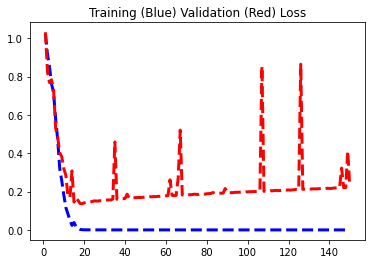

In [36]:
plt.plot(epoch_x, training_line, linewidth=3, linestyle="--",
         color="blue")
plt.plot(epoch_x, validation_line, linewidth=3, linestyle="--",
         color="red")
#plt.xlabel(r"Description of $x$ coordinate (units)")
#plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Training (Blue) Validation (Red) Loss")
#plt.xlim(0, 2*np.pi)
#plt.ylim(-1.1, 1.1)
#plt.legend(loc="lower left")
plt.show()

# The above graph seems to indicate the model is overfitting the training data. Note how the validation loss has an average positive slope. It seems to encounter in some epochs some particular set of images that it struggles to classify. These epochs shift each time the code is run. I'm curious, what happens if I graph the simpler architecture (before the addition of another pooling and convoluting layer?)

In [37]:
class ConvNetWithFewerLayers(nn.Module):
    
    def __init__(self):
        super(ConvNetWithFewerLayers, self).__init__()
        #initialize the convolutional layers
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 8, kernel_size = 3, stride = 1, padding = 1)

        
        ##initialize the fully connected layers
        self.fc1 = nn.Linear(in_features = 8*32*32, out_features = 10000) #NOTE: we are using maxpool (with a kernel size of 2) twice, so our 128 x 128 image becomes a 32*32 image.
        self.fc2 = nn.Linear(in_features = 10000, out_features = 500)
        self.fc3 = nn.Linear(in_features = 500, out_features = 4)
        
    def forward(self, _x):
        #Print statements below are useful for debugging shape mismatches.
        #print("input shape is: {}".format(_x.shape)) 
        _x = self.pool(F.relu(self.conv1(_x)))
        #print("shape after one convolution is: {}".format(_x.shape))
        
        _x = self.pool(F.relu(self.conv2(_x)))
        #print("shape after two convolutions is: {}".format(_x.shape))
        
        #In ConvNetWithFewerLayers, I remove the layer below
        
        #adding more layers for assignment:
        #_x = self.pool(F.relu(self.conv2(_x)))
        #print("shape after three convolutions is: {}".format(_x.shape))
        
        _x = _x.view(-1, 8*32*32)
        #print(_x.shape)
        _x = F.relu(self.fc1(_x))
        _x = F.relu(self.fc2(_x))
        _x = self.fc3(_x)
        
        return _x

In [38]:
EPOCHS = 150
cnn_model2 = ConvNetWithFewerLayers()
cnn_model2 = cnn_model2.to(device) #move to the GPU

#define the loss function and optimize

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model2.parameters(), lr=1e-3)

Epoch # 1
Training loss: 1.037272
Validation Loss: 0.902824 | Validation accuracy: 54.73%
Epoch # 2
Training loss: 0.876898
Validation Loss: 0.957649 | Validation accuracy: 56.49%
Epoch # 3
Training loss: 0.688809
Validation Loss: 0.567640 | Validation accuracy: 71.12%
Epoch # 4
Training loss: 0.399347
Validation Loss: 0.376529 | Validation accuracy: 83.9%
Epoch # 5
Training loss: 0.179045
Validation Loss: 0.178874 | Validation accuracy: 93.17%
Epoch # 6
Training loss: 0.076629
Validation Loss: 0.152719 | Validation accuracy: 94.73%
Epoch # 7
Training loss: 0.033674
Validation Loss: 0.124159 | Validation accuracy: 95.41%
Epoch # 8
Training loss: 0.037593
Validation Loss: 0.116321 | Validation accuracy: 96.98%
Epoch # 9
Training loss: 0.012757
Validation Loss: 0.125685 | Validation accuracy: 96.78%
Epoch # 10
Training loss: 0.004730
Validation Loss: 0.107028 | Validation accuracy: 97.07%
Epoch # 11
Training loss: 0.002961
Validation Loss: 0.105569 | Validation accuracy: 97.46%
Epoch # 1

Epoch # 92
Training loss: 0.000001
Validation Loss: 0.173635 | Validation accuracy: 97.76%
Epoch # 93
Training loss: 0.000001
Validation Loss: 0.174559 | Validation accuracy: 97.76%
Epoch # 94
Training loss: 0.000001
Validation Loss: 0.175207 | Validation accuracy: 97.76%
Epoch # 95
Training loss: 0.000001
Validation Loss: 0.175295 | Validation accuracy: 97.76%
Epoch # 96
Training loss: 0.000001
Validation Loss: 0.175819 | Validation accuracy: 97.85%
Epoch # 97
Training loss: 0.000001
Validation Loss: 0.176361 | Validation accuracy: 97.76%
Epoch # 98
Training loss: 0.000001
Validation Loss: 0.176978 | Validation accuracy: 97.76%
Epoch # 99
Training loss: 0.000001
Validation Loss: 0.178572 | Validation accuracy: 97.76%
Epoch # 100
Training loss: 0.000001
Validation Loss: 0.178689 | Validation accuracy: 97.76%
Epoch # 101
Training loss: 0.000001
Validation Loss: 0.178461 | Validation accuracy: 97.66%
Epoch # 102
Training loss: 0.000001
Validation Loss: 0.179317 | Validation accuracy: 97.

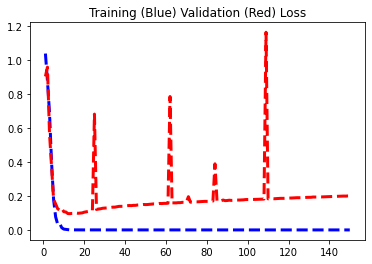

In [39]:
    
epoch_g_list = []
training_g_list = []
validation_g_list = []
    
    
training_loss = []
validation_loss = []
validation_accuracy = []



for epoch in range(1, EPOCHS + 1):
    cnn_model2.train()
    batch_loss = []
    
#Training the CNN
    for idx, (image_batch, label_batch) in enumerate(train_loader):

        #move the data to the device/GPU
        image_batch = image_batch.to(device)
        label_batch = label_batch.to(device)

        #forward pass
        pred_labels = cnn_model2(image_batch)

        #calculate the loss (how wrong the prediction is; i.e. the difference between the predictions and the actual labels)
        loss = loss_function(pred_labels, label_batch)
        batch_loss.append(loss.item())

        #backward pass
        loss.backward()

        optimizer.step() #update parameters, weights, and learning rate (Adam)

        #clear gradients
        optimizer.zero_grad()

    #Evaluate the CNN using the validation set
    cnn_model2.eval()
    val_loss, val_accuracy = evaluate_model(val_loader, cnn_model2, loss_function)

    validation_loss.append(val_loss)
    validation_accuracy.append(val_accuracy)

    #print the loss
    #show epoch and avg loss

    training_loss.append(sum(batch_loss)/len(batch_loss))
    print("Epoch # {}".format(epoch))
    print('Training loss: {:6f}'.format(training_loss[-1]))
    print('Validation Loss: {:.6f} | Validation accuracy: {}%'.format(val_loss, round(val_accuracy * 100, 2)))
    
    epoch_g_list.append(epoch)
    training_g_list.append(training_loss[-1])
    validation_g_list.append(val_loss)
 
    

    

training_line = training_g_list
validation_line = validation_g_list
epoch_x = epoch_g_list

plt.plot(epoch_x, training_line, linewidth=3, linestyle="--",
         color="blue")
plt.plot(epoch_x, validation_line, linewidth=3, linestyle="--",
         color="red")
#plt.xlabel(r"Description of $x$ coordinate (units)")
#plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Training (Blue) Validation (Red) Loss")
#plt.xlim(0, 2*np.pi)
#plt.ylim(-1.1, 1.1)
#plt.legend(loc="lower left")
plt.show()

In [40]:
# It looks like a CNN with fewer layers does better, but I wouldn't be so certain of this. 
# Much seems to be dependent on the particular epoch or, in other words, the batch of images the model
# is currently looking at.

In [41]:
class ConvNetwithDropout(ConvNet):
    def __init__(self):
        super(ConvNetwithDropout, self).__init__()
        self.dropout = nn.Dropout(0.50)
        
    def forward(self, _x):
        _x = self.pool(F.relu(self.conv1(_x)))        
        _x = self.pool(F.relu(self.conv2(_x)))
        _x = self.pool(F.relu(self.conv2(_x)))
        _x = _x.view(-1, 8*16*16)
        #print(_x.shape)
        _x = F.relu(self.fc1(_x))
        #DROPOUT ADDED HERE
        _x = self.dropout(_x)
        _x = F.relu(self.fc2(_x))
        _x = self.fc3(_x)
        
        return _x

Epoch # 1
Training loss: 1.065990
Validation Loss: 1.062341 | Validation accuracy: 50.05%
Epoch # 2
Training loss: 0.983042
Validation Loss: 0.991800 | Validation accuracy: 53.66%
Epoch # 3
Training loss: 0.915386
Validation Loss: 0.880593 | Validation accuracy: 54.83%
Epoch # 4
Training loss: 0.891915
Validation Loss: 0.846526 | Validation accuracy: 59.51%
Epoch # 5
Training loss: 0.853823
Validation Loss: 0.838535 | Validation accuracy: 60.2%
Epoch # 6
Training loss: 0.820501
Validation Loss: 0.787826 | Validation accuracy: 61.27%
Epoch # 7
Training loss: 0.736738
Validation Loss: 0.821766 | Validation accuracy: 68.29%
Epoch # 8
Training loss: 0.684106
Validation Loss: 0.743251 | Validation accuracy: 66.54%
Epoch # 9
Training loss: 0.620375
Validation Loss: 0.626022 | Validation accuracy: 71.41%
Epoch # 10
Training loss: 0.536671
Validation Loss: 0.541743 | Validation accuracy: 75.9%
Epoch # 11
Training loss: 0.452622
Validation Loss: 0.468454 | Validation accuracy: 77.27%
Epoch # 12

Epoch # 92
Training loss: 0.016767
Validation Loss: 0.121454 | Validation accuracy: 96.49%
Epoch # 93
Training loss: 0.011848
Validation Loss: 0.100710 | Validation accuracy: 97.46%
Epoch # 94
Training loss: 0.004101
Validation Loss: 0.115070 | Validation accuracy: 97.56%
Epoch # 95
Training loss: 0.005359
Validation Loss: 0.089819 | Validation accuracy: 98.05%
Epoch # 96
Training loss: 0.009684
Validation Loss: 0.111469 | Validation accuracy: 98.05%
Epoch # 97
Training loss: 0.007592
Validation Loss: 0.093326 | Validation accuracy: 98.44%
Epoch # 98
Training loss: 0.005913
Validation Loss: 0.120066 | Validation accuracy: 97.76%
Epoch # 99
Training loss: 0.014826
Validation Loss: 0.150186 | Validation accuracy: 97.66%
Epoch # 100
Training loss: 0.014714
Validation Loss: 0.100938 | Validation accuracy: 97.46%
Epoch # 101
Training loss: 0.011657
Validation Loss: 0.144230 | Validation accuracy: 96.98%
Epoch # 102
Training loss: 0.014112
Validation Loss: 0.093732 | Validation accuracy: 97.

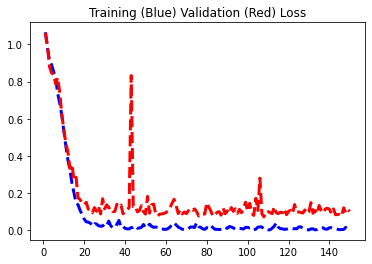

In [42]:
cnn_model3 = ConvNetwithDropout()
cnn_model3 = cnn_model3.to(device) #move to the GPU

#define the loss function and optimize

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model3.parameters(), lr=1e-3)


epoch_g_list = []
training_g_list = []
validation_g_list = []
    
    
training_loss = []
validation_loss = []
validation_accuracy = []



for epoch in range(1, EPOCHS + 1):
    cnn_model3.train()
    batch_loss = []
    
#Training the CNN
    for idx, (image_batch, label_batch) in enumerate(train_loader):

        #move the data to the device/GPU
        image_batch = image_batch.to(device)
        label_batch = label_batch.to(device)

        #forward pass
        pred_labels = cnn_model3(image_batch)

        #calculate the loss (how wrong the prediction is; i.e. the difference between the predictions and the actual labels)
        loss = loss_function(pred_labels, label_batch)
        batch_loss.append(loss.item())

        #backward pass
        loss.backward()

        optimizer.step() #update parameters, weights, and learning rate (Adam)

        #clear gradients
        optimizer.zero_grad()

    #Evaluate the CNN using the validation set
    cnn_model3.eval()
    val_loss, val_accuracy = evaluate_model(val_loader, cnn_model3, loss_function)

    validation_loss.append(val_loss)
    validation_accuracy.append(val_accuracy)

    #print the loss
    #show epoch and avg loss

    training_loss.append(sum(batch_loss)/len(batch_loss))
    print("Epoch # {}".format(epoch))
    print('Training loss: {:6f}'.format(training_loss[-1]))
    print('Validation Loss: {:.6f} | Validation accuracy: {}%'.format(val_loss, round(val_accuracy * 100, 2)))
    
    epoch_g_list.append(epoch)
    training_g_list.append(training_loss[-1])
    validation_g_list.append(val_loss)
 
    

    

training_line = training_g_list
validation_line = validation_g_list
epoch_x = epoch_g_list

plt.plot(epoch_x, training_line, linewidth=3, linestyle="--",
         color="blue")
plt.plot(epoch_x, validation_line, linewidth=3, linestyle="--",
         color="red")
#plt.xlabel(r"Description of $x$ coordinate (units)")
#plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Training (Blue) Validation (Red) Loss")
#plt.xlim(0, 2*np.pi)
#plt.ylim(-1.1, 1.1)
#plt.legend(loc="lower left")
plt.show()

In [43]:
#I've experimented some with different dropout probabilities (0.25, 0.33, 0.5). 
# 0.5 seemed to do the best in reducing variance in validation loss.

Epoch # 1
Training loss: 0.011307
Validation Loss: 0.138329 | Validation accuracy: 98.05%
Epoch # 2
Training loss: 0.001722
Validation Loss: 0.130244 | Validation accuracy: 98.05%
Epoch # 3
Training loss: 0.006046
Validation Loss: 0.148687 | Validation accuracy: 97.66%
Epoch # 4
Training loss: 0.011287
Validation Loss: 0.121442 | Validation accuracy: 98.24%
Epoch # 5
Training loss: 0.021476
Validation Loss: 0.119136 | Validation accuracy: 97.76%
Epoch # 6
Training loss: 0.012307
Validation Loss: 0.106745 | Validation accuracy: 98.24%
Epoch # 7
Training loss: 0.017296
Validation Loss: 0.091486 | Validation accuracy: 97.66%
Epoch # 8
Training loss: 0.002749
Validation Loss: 0.097642 | Validation accuracy: 98.44%
Epoch # 9
Training loss: 0.004000
Validation Loss: 0.087127 | Validation accuracy: 98.24%
Epoch # 10
Training loss: 0.003434
Validation Loss: 0.125639 | Validation accuracy: 97.76%
Epoch # 11
Training loss: 0.003684
Validation Loss: 0.089772 | Validation accuracy: 98.63%
Epoch # 

Epoch # 92
Training loss: 0.000433
Validation Loss: 0.094711 | Validation accuracy: 98.73%
Epoch # 93
Training loss: 0.000168
Validation Loss: 0.106191 | Validation accuracy: 98.54%
Epoch # 94
Training loss: 0.000545
Validation Loss: 0.091507 | Validation accuracy: 98.73%
Epoch # 95
Training loss: 0.000132
Validation Loss: 0.092401 | Validation accuracy: 98.83%
Epoch # 96
Training loss: 0.000155
Validation Loss: 0.091399 | Validation accuracy: 98.93%
Epoch # 97
Training loss: 0.004250
Validation Loss: 0.171035 | Validation accuracy: 97.66%
Epoch # 98
Training loss: 0.002643
Validation Loss: 0.087318 | Validation accuracy: 98.83%
Epoch # 99
Training loss: 0.012780
Validation Loss: 0.083714 | Validation accuracy: 98.24%
Epoch # 100
Training loss: 0.019373
Validation Loss: 0.079950 | Validation accuracy: 98.54%
Epoch # 101
Training loss: 0.014270
Validation Loss: 0.072015 | Validation accuracy: 98.24%
Epoch # 102
Training loss: 0.010890
Validation Loss: 0.113663 | Validation accuracy: 98.

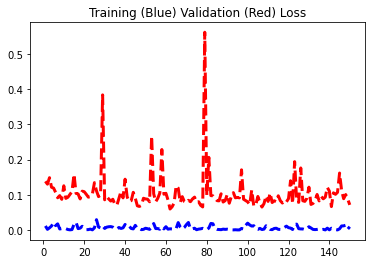

In [44]:
class ConvNetwithDropout(ConvNet):
    def __init__(self):
        super(ConvNetwithDropout, self).__init__()
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, _x):
        _x = self.pool(F.relu(self.conv1(_x)))        
        _x = self.pool(F.relu(self.conv2(_x)))
        _x = self.pool(F.relu(self.conv2(_x)))
        _x = _x.view(-1, 8*16*16)
        #print(_x.shape)
        _x = F.relu(self.fc1(_x))
        #DROPOUT ADDED HERE
        _x = self.dropout(_x)
        _x = F.relu(self.fc2(_x))
        _x = self.fc3(_x)
        
        return _x
    
    cnn_model3 = ConvNetwithDropout()
cnn_model3 = cnn_model3.to(device) #move to the GPU

#define the loss function and optimize

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model3.parameters(), lr=1e-3)


epoch_g_list = []
training_g_list = []
validation_g_list = []
    
    
training_loss = []
validation_loss = []
validation_accuracy = []



for epoch in range(1, EPOCHS + 1):
    cnn_model3.train()
    batch_loss = []
    
#Training the CNN
    for idx, (image_batch, label_batch) in enumerate(train_loader):

        #move the data to the device/GPU
        image_batch = image_batch.to(device)
        label_batch = label_batch.to(device)

        #forward pass
        pred_labels = cnn_model3(image_batch)

        #calculate the loss (how wrong the prediction is; i.e. the difference between the predictions and the actual labels)
        loss = loss_function(pred_labels, label_batch)
        batch_loss.append(loss.item())

        #backward pass
        loss.backward()

        optimizer.step() #update parameters, weights, and learning rate (Adam)

        #clear gradients
        optimizer.zero_grad()

    #Evaluate the CNN using the validation set
    cnn_model3.eval()
    val_loss, val_accuracy = evaluate_model(val_loader, cnn_model3, loss_function)

    validation_loss.append(val_loss)
    validation_accuracy.append(val_accuracy)

    #print the loss
    #show epoch and avg loss

    training_loss.append(sum(batch_loss)/len(batch_loss))
    print("Epoch # {}".format(epoch))
    print('Training loss: {:6f}'.format(training_loss[-1]))
    print('Validation Loss: {:.6f} | Validation accuracy: {}%'.format(val_loss, round(val_accuracy * 100, 2)))
    
    epoch_g_list.append(epoch)
    training_g_list.append(training_loss[-1])
    validation_g_list.append(val_loss)
 
    

    

training_line = training_g_list
validation_line = validation_g_list
epoch_x = epoch_g_list

plt.plot(epoch_x, training_line, linewidth=3, linestyle="--",
         color="blue")
plt.plot(epoch_x, validation_line, linewidth=3, linestyle="--",
         color="red")
#plt.xlabel(r"Description of $x$ coordinate (units)")
#plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Training (Blue) Validation (Red) Loss")
#plt.xlim(0, 2*np.pi)
#plt.ylim(-1.1, 1.1)
#plt.legend(loc="lower left")
plt.show()

# Final predictions and Confusion Matrix

In [45]:
cnn_model3.eval()
test_images_batch = test_images_batch.to(device)

In [46]:
preds = cnn_model3(test_images_batch)

 ### should be a tensor with dimension 40 x 4 indicating a batch size of 40 and values for each of the four classifications

In [47]:
print(preds.size()) 

torch.Size([40, 4])


In [50]:
print(torch.max(preds[0]))

tensor(6.8708, device='cuda:0', grad_fn=<MaxBackward1>)


### To get the classification, we want the index of the maximum value. The second argument of torch.max says we want the maximum value of the four probabilities associated with each classification, i.e. those values on the second dimension of the tensor.

In [51]:
_, index = torch.max(preds, 1)

In [52]:
print(index)

tensor([2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 0, 2, 3, 3, 3, 2, 2,
        3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2], device='cuda:0')


In [56]:
for ix, classif in enumerate(test_data.classes):
    print(ix, classif)

0 MildDemented
1 ModerateDemented
2 NonDemented
3 VeryMildDemented


In [53]:
pred_labels = [test_data.classes[x] for x in index]

In [57]:
actual_labels = [test_data.classes[x] for x in test_label_batch]

In [58]:
print(len(actual_labels))

40


In [59]:
print(actual_labels)

['NonDemented', 'MildDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'MildDemented', 'NonDemented', 'VeryMildDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'MildDemented', 'VeryMildDemented', 'NonDemented', 'VeryMildDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'NonDemented', 'NonDemented']


In [60]:
import sklearn

In [61]:
print(sklearn.__version__)

0.23.2


In [62]:
#for sklearn pre version 1.0:

In [63]:
print(test_data.classes)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

In [67]:
from sklearn.metrics import confusion_matrix
def confusion_matx(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot()
    return plt.show()

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (4).

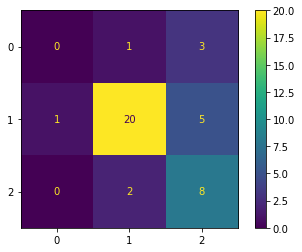

In [68]:
confusion_matx(actual_labels, pred_labels, class_names = test_data.classes)

In [38]:
len(test_data.classes)

4

In [39]:
set(pred_labels)

{'MildDemented', 'NonDemented', 'VeryMildDemented'}

In [40]:
test_data.classes.remove('ModerateDemented')

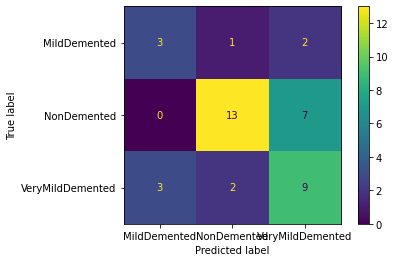

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(actual_labels, pred_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=test_data.classes)
cmd.plot()

In [ ]:

# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_estimator(cnn_model3, test_images_batch, test_label_batch)